# Exploratory Data Analysis (EDA)
- What is EDA?
    - It is the process to apply statistics and plotting tools to understand how the dataset is distributed.
- Lets Take Data set and Perform Differnt EDA Technique to understand about the data and some insights of them

## Techniques for EDA
-   Plotting: scatter plot (2D,3D,Pair Plots,PDF,CDf,box-plot,violin plot,contour plot)
-   Probability and Stats:
        1. counts, mean, std-dev, median,percentile,IQR(inter Quantile range)
        2. Distribution and skewness
        3. Correlations
        4. Hypothesis testing
    -  Visualising High Dimension data: PCA and t-sne
    -  Model Based , Rule Based ,Linear and logistic Regresssion , Feature Imp,Feature Colinearility
    -  cluster analysis
-   Questions(question that hepls to define the objective)
        1. different for different problems and different dataset
        2. pracctice on so many dataset
        3. High Level stats (asa above describe)
        4. Feature wise analysis:
            a. categoricak feature , disttribution of categories
            b. Real value (distribution of feature)
            c. missing values and imputation
            d. outlier in feature value
        5. Feature vs output
            a. Correlation
            b. build model with only one feature
            c. P(Y_i=1|f_j=k)
        6. What other feature might work?
            i. Groupby + count on raw data
            ii. Binning features using Decision Tree
            iii. Intraction variable using DT.
            iv.Mathmetical transformation log,exp,sqr,box-cox
            v. Normalization , stdandization, one -hot encoding
            vii. Matrix Factorization based features
            vii. Autoencoder based features
            viii. clustring of features
            ix. different encoding W2V , tf-idf ...
        7. High dimension viz.
            i, are there clustering of in regirion where it perfrom badly?
            ii. why i am observing more error while classifying class-i and class_j
            iii. what example are messing model
        8. EDA on
            a. Text Data : word counts , like hood in naive bayes ,linear model and feature
            b. time series data: repeatation , fourier transform , maving averages
            c. image data: CNN featurization + tsne+see the raw images

### DataSet: IRIS Flower


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [2]:
# know the number of columns we have
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [3]:
# To knows the number of  data point distributed based on catagary
iris['species'].value_counts()
#balanced dataset and non -balance dataset
#in this case dataset is balanced

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

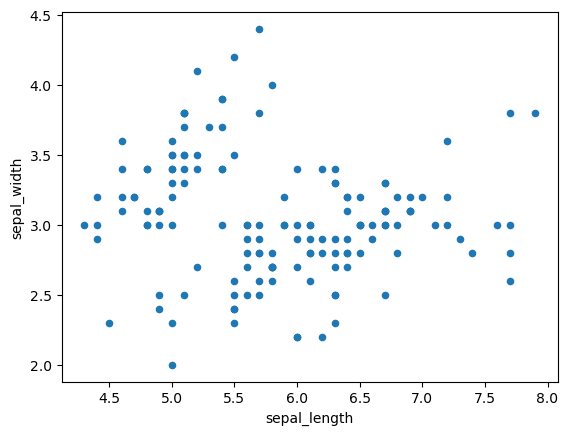

since in the plot the dataset megre with the same color to give color we use  seaborn


In [4]:
# 2-d scatter plot
import matplotlib.pyplot as plt
iris.plot(kind='scatter',x='sepal_length',y='sepal_width')
plt.show()
print("since in the plot the dataset megre with the same color to give color we use  seaborn")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


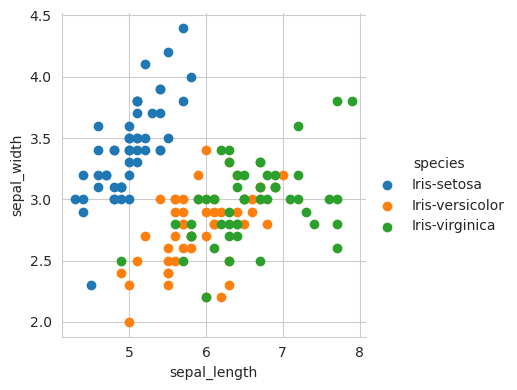

In [5]:
import seaborn as sns
# Scatter plot with color coding for each class label
sns.set_style("whitegrid")
sns.FacetGrid(iris,hue="species",height=4).map(plt.scatter,'sepal_length','sepal_width').add_legend()
plt.show()

- observation of plot
    - As we can see the blue points are easily seperable from other two points while read and green are merged at some extent so Using sepal length and sepal width we can seperate setosa from other where as its hard to seperate the versicolor from verginica since they are overlap

#### Since In IRIS Data set we have 4 feature so lets do pair plot to see feature which are important how the feature related to other and class label
  - To do pairplot if we have n feature then # of plots are NC2 that so it is usefull if number of feature are 5 or 6 at max

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


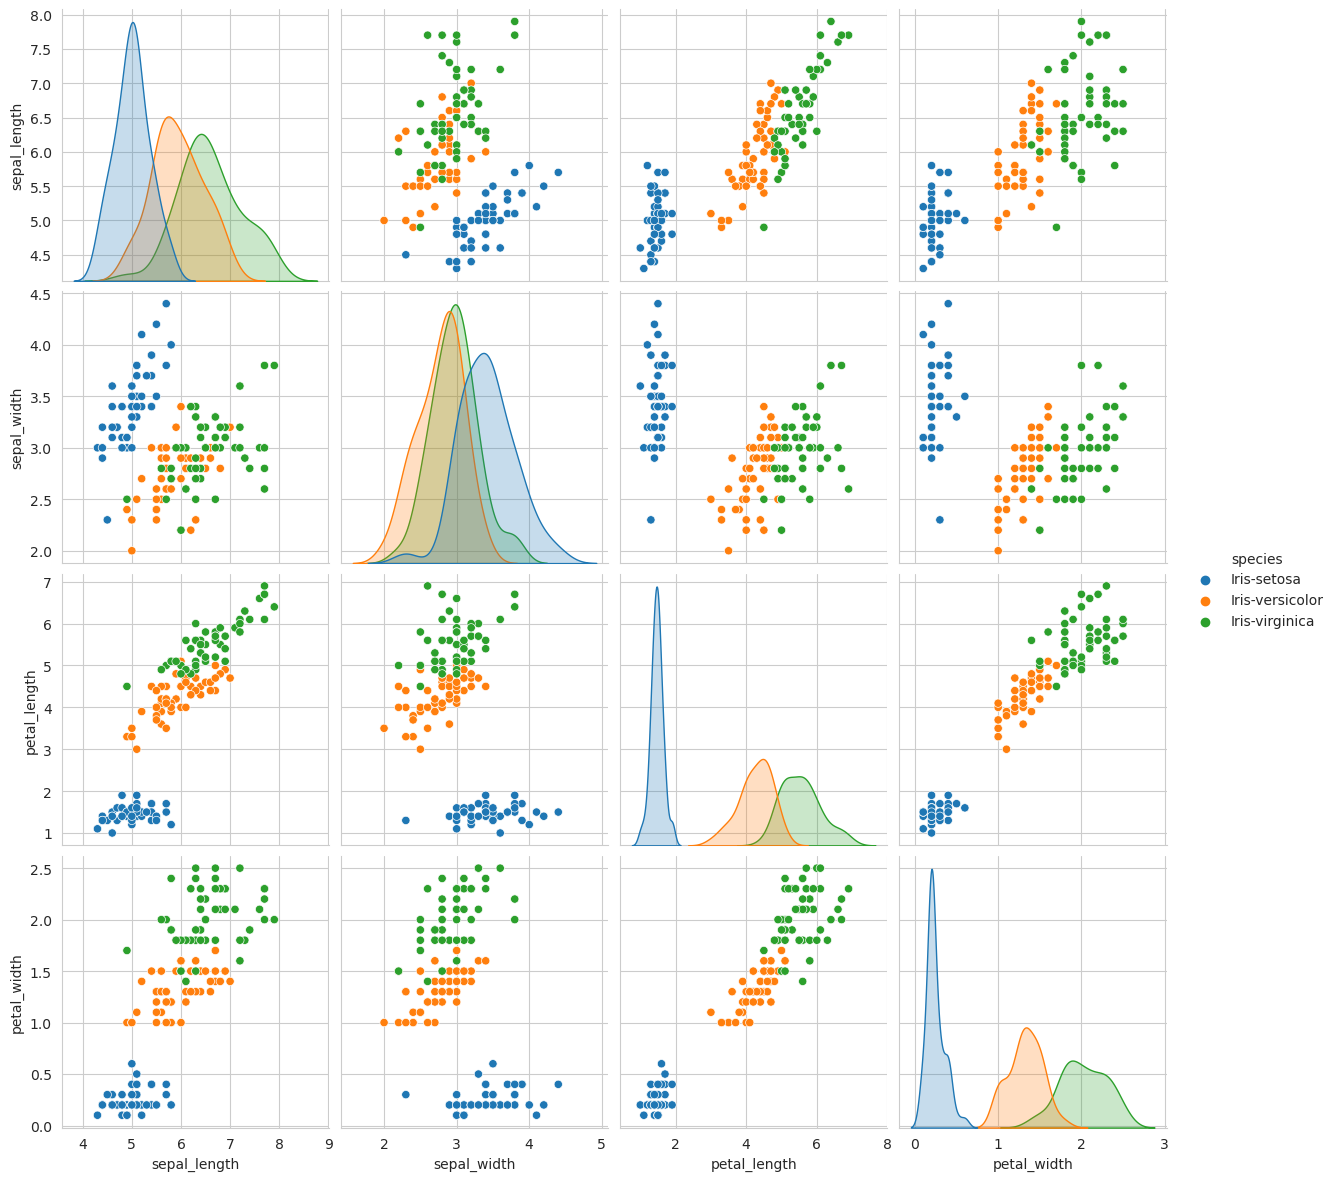

In [6]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",height=3)
plt.show()

- observation of plot
    - As we can see from pair plot petal length and petal width easily seperate the setosa from other we can say ( if petal length <=2 and petal width <=1) its an setosa  also verginica and versicolor have some operlap but they are almost linearly seperable now with  these two observation we can conclude that petal length aand petal width are important feature to classify the iris flowers.
    - we can even create basic if else model to classify the flowers

## univarient Analysis

- It is best way to analyise the each feature of dataset so that we can understand the how a feature important for seperating data points
- Techniques in univariate analysis HistgGrams , PDF , CDF, 1-D Scatter plot using one Feature
- It is used to know the range of values in which all data points beongs with and we are also able to detect the outliers in that feature

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


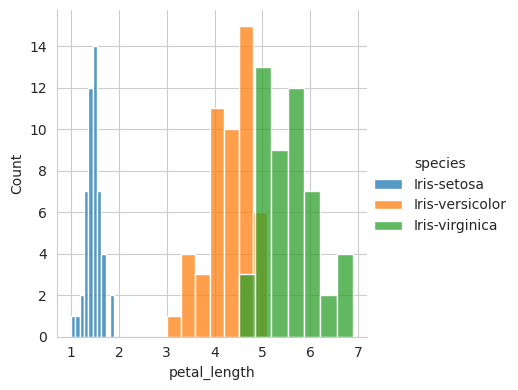

In [7]:
# Analysis on Petal Length 
sns.FacetGrid(iris,hue="species",height=4).map(sns.histplot,"petal_length").add_legend()
plt.show()

PDF on petal lebgth for setosa flower [0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
CDF on petal lebgth for setosa flower [0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


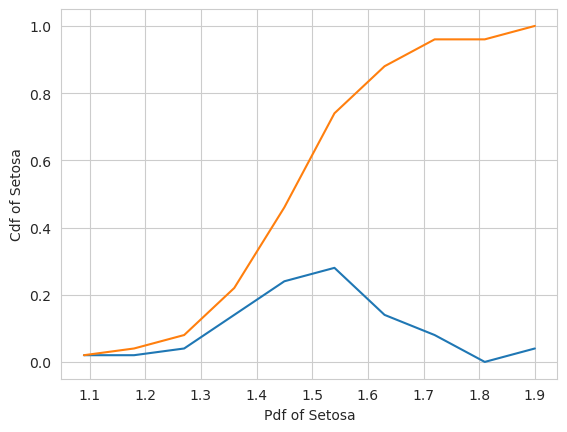

In [8]:
#split the data set on differnt flowers
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
#compute PDF,CDF on petal length for setosa flower
counts,bin_edge=np.histogram(iris_setosa['petal_length'],bins=10,density=True)
# To Calculate P.D.F
pdf=counts/sum(counts)
print("PDF on petal lebgth for setosa flower",pdf)
cdf=np.cumsum(pdf)
print("CDF on petal lebgth for setosa flower",cdf)
#plot the pdf and cdf for setosa
plt.xlabel("Pdf of Setosa")
plt.ylabel("Cdf of Setosa")
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)
plt.show()

In [9]:
#statitical computation
# mean (tell us the central tendency of data distribution)
#varience (tell us the spread of data across the mean)
mean_of_setosa=np.mean(iris_setosa["petal_length"])
# Similar we compute for verginica and versicolor
mean_of_virginica=np.mean(iris_virginica["petal_length"])
mean_of_versicolor=np.mean(iris_versicolor["petal_length"])
print("mean of family of iris flower",mean_of_setosa,mean_of_versicolor,mean_of_virginica)
#varience
varience=sum((iris_setosa["petal_length"]-1.464)**2)/50
standerd_deviation=varience**(1/2)
print("varience and std",varience,standerd_deviation)
# but as we know the problem with mean and varience they easily get currupted because of even single outlier
#we use median and median absolute deviation
median=np.median(iris_setosa["petal_length"])
print("Median",median)

# Compute the percentile
x=80 # x is how much percentile you want
percent=np.percentile(iris_setosa["petal_length"],x)
print("{} Percent of data point have the petal length less then {}".format(x,percent))
print("one of the use of percentile is to answer the question that in how many days the prouct should delivered?")


mean of family of iris flower 1.464 4.26 5.5520000000000005
varience and std 0.02950400000000001 0.17176728442867115
Median 1.5
80 Percent of data point have the petal length less then 1.6
one of the use of percentile is to answer the question that in how many days the prouct should delivered?


- use statsmodel.robust to compute differnt statistical measures


In [10]:
#median abosulute deviation ( similar to STD)
import statsmodels.robust as smr
smr.mad(iris_setosa["petal_length"])

0.14826022185056031

[]

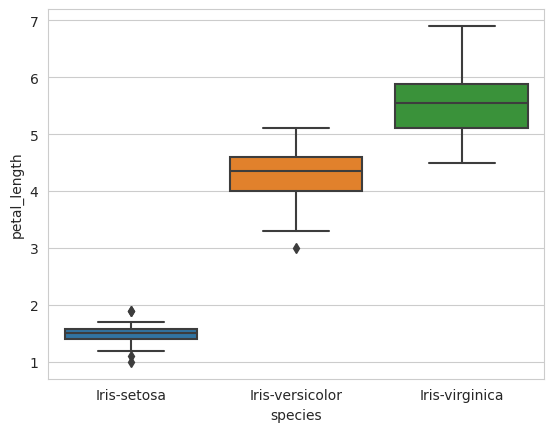

In [11]:
# In Histogram we cant visuallise the percentile there is other plotting tool i.e boxplot
sns.boxplot(x="species",y="petal_length",data=iris)
plt.plot()

- Interpretation:
    - As we can see in the plot that all of my setosa flower are petal length<=2 
    - the lower line of plot let me about the 25th percentile , middle as 50th.
- As we know in histogram we can see the distribution of data and in box we can see the percentile there is plot that have advantage of both of them is "violin plot"

[]

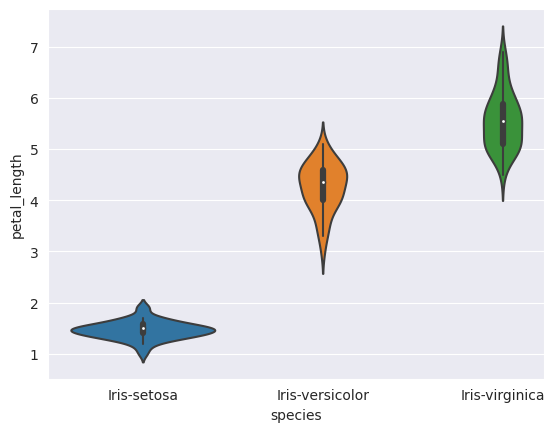

In [12]:
sns.set_style("darkgrid")
sns.violinplot(x="species",y="petal_length",data=iris,height=10)
plt.plot()

- We can perform the similar analysis for all the feature like petal widh , sepal length and sepal width